In [46]:
import pandas as pd
from core.convert_data import class2numeric, norm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from models.SVM import SVM

In [47]:
data = pd.read_csv("data/mushrooms.csv")
data = class2numeric(data)
data['bias'] = 1

In [48]:
Y = data['class']
X = data.drop(['class'], axis=1)
X = norm(X)

In [49]:
Y = np.array(Y)
X = np.array(X)
Y[Y == 0] = -1

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [51]:
model = SVM(X_train, y_train)

In [52]:
def mar():
    margin = model.margin_()
    margin = np.sort(np.array(margin))
    plt.grid()
    plt.plot(np.sort(margin))

In [53]:
model.fit(epochs=10)

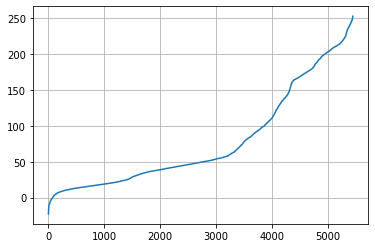

In [54]:
mar()

In [55]:
np.sum(model.predict(X_test) == y_test) / len(X_test)

0.9865721745617307

In [56]:
np.sum(model.predict(X_train) == y_train) / len(X_train)

0.9858533896748117

In [57]:
percept = Perceptron().fit(X_train, y_train)
np.sum(percept.predict(X_test) == y_test) / len(X_test)

0.999627004848937

In [58]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [59]:
model_test = SVM(X_train, y_train).fit()

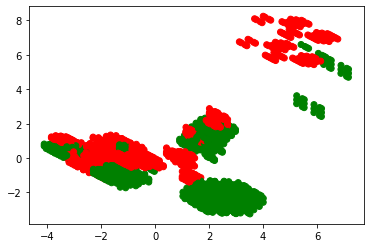

In [68]:
color = {-1:'green', 1:'red'}
plt.scatter(X[:, 0], X[:, 1], c=[color[y] for y in Y])
plt.show()


In [64]:
np.sum(model_test.predict(X_test) == y_test) / len(X_test)

0.8366281238343901